# NAME:KATURI NARENDRA

# Data Analytics Project
### Dataset Used:Global Super Store Dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Superstore.csv")#loading dataset using Pandas
print(df.head())

   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891   7/31/2012   7/31/2012      Same Day    RH-19495   
1   26341    IN-2013-77878    2/5/2013    2/7/2013  Second Class    JR-16210   
2   25330    IN-2013-71249  10/17/2013  10/18/2013   First Class    CR-12730   
3   13524  ES-2013-1579342   1/28/2013   1/30/2013   First Class    KM-16375   
4   47221     SG-2013-4320   11/5/2013   11/6/2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology 

In [3]:
print(df.shape)

(51290, 24)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [5]:
print(df.isnull()) #Finding Null values

       Row ID  Order ID  Order Date  Ship Date  Ship Mode  Customer ID  \
0       False     False       False      False      False        False   
1       False     False       False      False      False        False   
2       False     False       False      False      False        False   
3       False     False       False      False      False        False   
4       False     False       False      False      False        False   
...       ...       ...         ...        ...        ...          ...   
51285   False     False       False      False      False        False   
51286   False     False       False      False      False        False   
51287   False     False       False      False      False        False   
51288   False     False       False      False      False        False   
51289   False     False       False      False      False        False   

       Customer Name  Segment   City  State  ...  Product ID  Category  \
0              False    False  False 

In [6]:
print(df.isnull().sum()) 

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [7]:
df = df.drop(columns=['Postal Code'])#dropping Postal Code Column as it is not necessary and has null values 

In [9]:
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


In [10]:
# converting object to datetime
df["Order Date"]=pd.to_datetime(df["Order Date"])
df["Ship Date"]=pd.to_datetime(df["Ship Date"])
#converting object to category
df['Ship Mode'] = df['Ship Mode'].astype('category')
df['Segment'] = df['Segment'].astype('category')
df['Country'] = df['Country'].astype('category')
df['Market'] = df['Market'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Category'] = df['Category'].astype('category')
df['Sub-Category'] = df['Sub-Category'].astype('category')
df['Order Priority'] = df['Order Priority'].astype('category')#converting object to category saves memory

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  category      
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  category      
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  category      
 11  Market          51290 non-null  category      
 12  Region          51290 non-null  category      
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  category      
 15  Su

In [12]:
#Summary statistics for numerical columns
numerical_summary = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']].describe()

# Summary statistics for categorical columns
categorical_summary = {
    'Ship Mode': df['Ship Mode'].value_counts(),
    'Segment': df['Segment'].value_counts(),
    'City': df['City'].value_counts().head(),  # Top 5 cities
    'State': df['State'].value_counts().head(),  # Top 5 states
    'Country': df['Country'].value_counts(),
    'Market': df['Market'].value_counts(),
    'Region': df['Region'].value_counts(),
    'Category': df['Category'].value_counts(),
    'Sub-Category': df['Sub-Category'].value_counts(),
    'Order Priority': df['Order Priority'].value_counts()
}


print("Numerical Summary Statistics:")
print(numerical_summary)

print("\nCategorical Summary Statistics:")
for key, value in categorical_summary.items():
    print(f"\n{key}:\n{value}")

Numerical Summary Statistics:
              Sales      Quantity      Discount        Profit  Shipping Cost
count  51290.000000  51290.000000  51290.000000  51290.000000   51290.000000
mean     246.490581      3.476545      0.142908     28.610982      26.375915
std      487.565361      2.278766      0.212280    174.340972      57.296804
min        0.444000      1.000000      0.000000  -6599.978000       0.000000
25%       30.758625      2.000000      0.000000      0.000000       2.610000
50%       85.053000      3.000000      0.000000      9.240000       7.790000
75%      251.053200      5.000000      0.200000     36.810000      24.450000
max    22638.480000     14.000000      0.850000   8399.976000     933.570000

Categorical Summary Statistics:

Ship Mode:
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64

Segment:
Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

City

# Sales Report

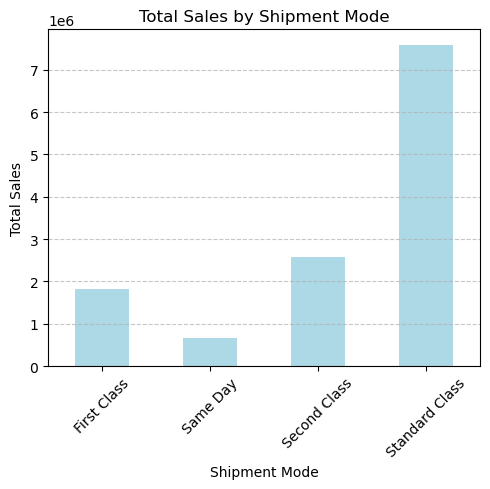

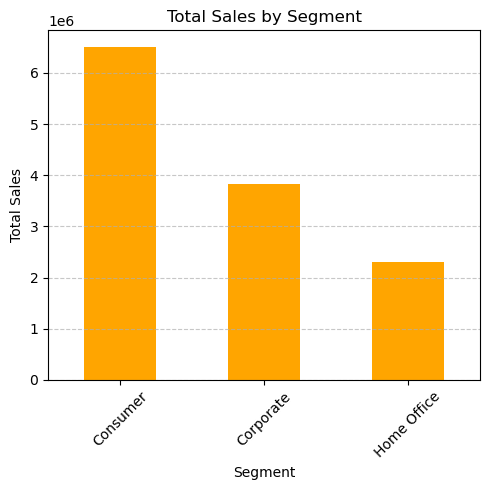

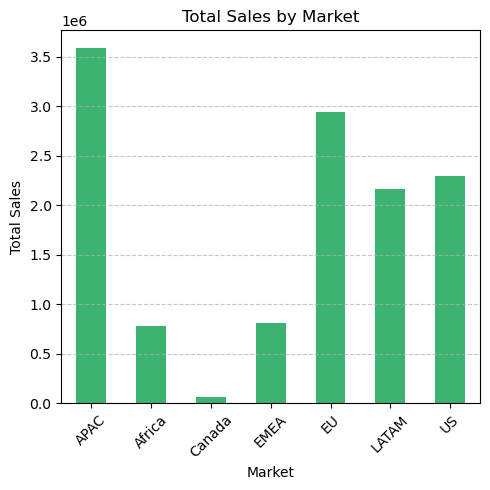

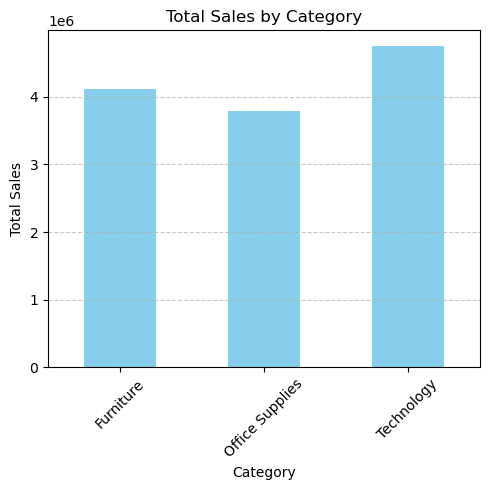

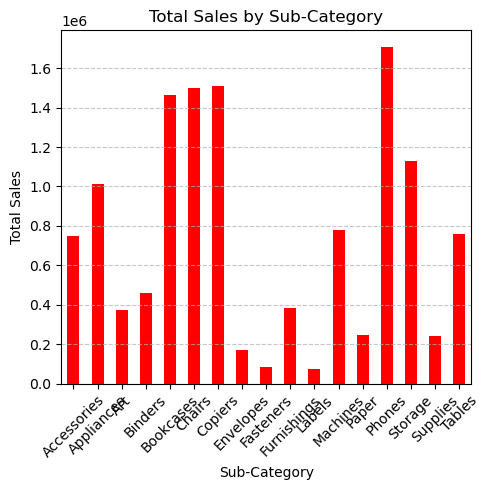

In [21]:
#Total Sales By Shipment mode
# Group by Ship Mode and sum sales
shipment_sales = df.groupby('Ship Mode')['Sales'].sum()
plt.figure(figsize=(5, 5))
shipment_sales.plot(kind='bar', color='lightblue')
plt.title('Total Sales by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


#Total Sales by Segment
segment_sales = df.groupby('Segment')['Sales'].sum()
plt.figure(figsize=(5, 5))
segment_sales.plot(kind='bar', color='orange')
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#Total Sales By Market
# Group by Market and sum sales
market_sales = df.groupby('Market')['Sales'].sum()
plt.figure(figsize=(5, 5))
market_sales.plot(kind='bar', color='mediumseagreen')
plt.title('Total Sales by Market')
plt.xlabel('Market')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#Total Sales By Category
# Group by Category and sum sales
category_sales = df.groupby('Category')['Sales'].sum()
plt.figure(figsize=(5, 5))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#Total Sales by Sub-Category
# Group by Category and sum sales
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum()
plt.figure(figsize=(5, 5))
sub_category_sales.plot(kind='bar', color='red')
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

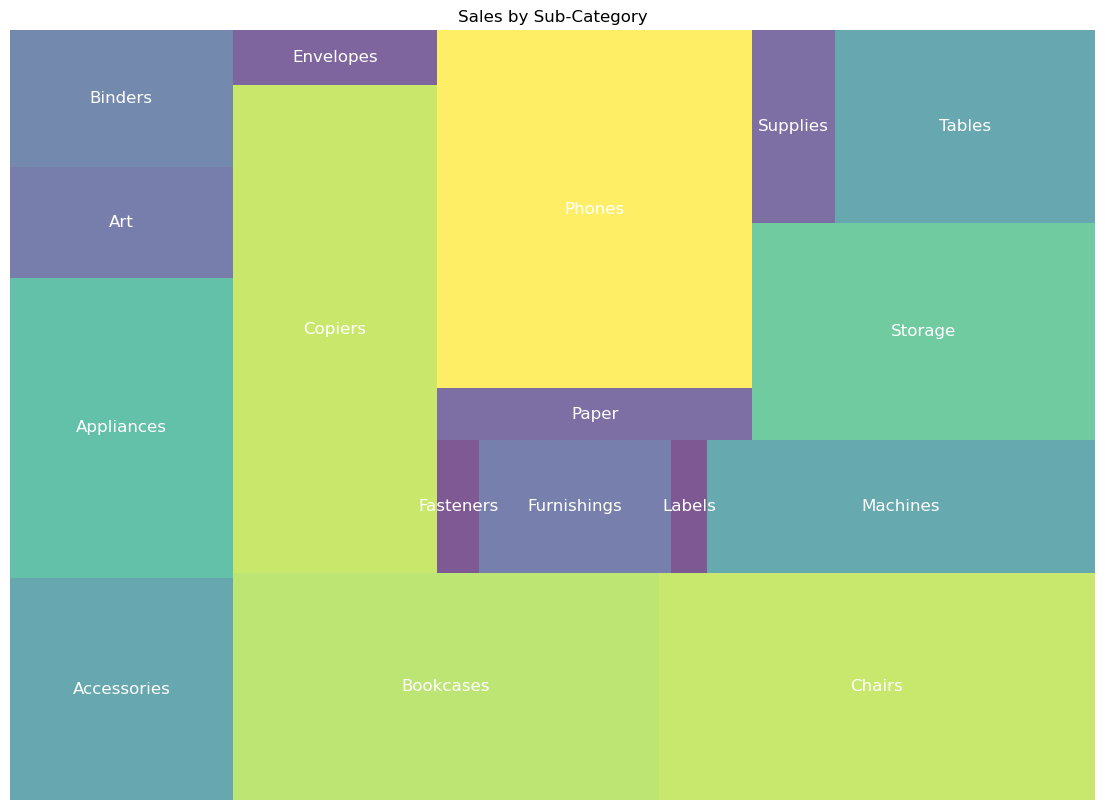

In [32]:
import squarify
# Aggregating sales by Sub-Category
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index()
# Preparing data for tree map
sizes = sub_category_sales['Sales']
labels = sub_category_sales['Sub-Category']
plt.figure(figsize=(14, 10))
# Creating a color map from matplotlib's colormap
colors = plt.cm.viridis(sizes / max(sizes))  # Normalize sizes for colormap
# Ploting tree map
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7, text_kwargs={'fontsize':12, 'color':'white'})
plt.title('Sales by Sub-Category')
plt.axis('off')
plt.show()

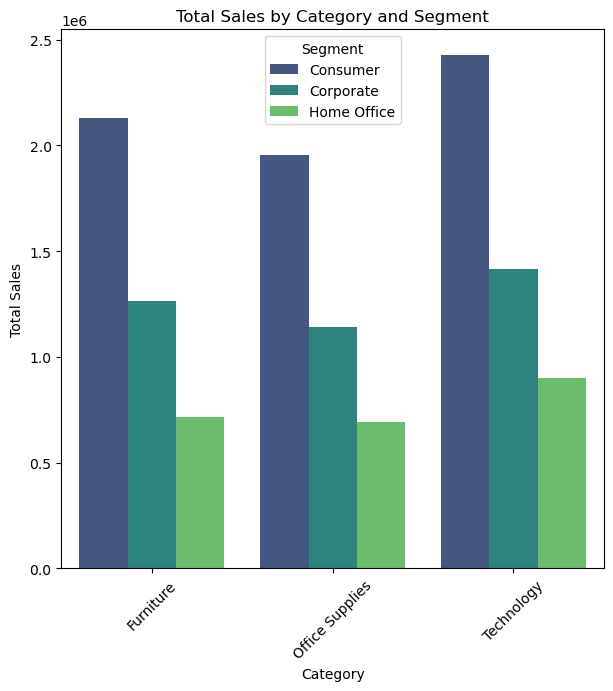

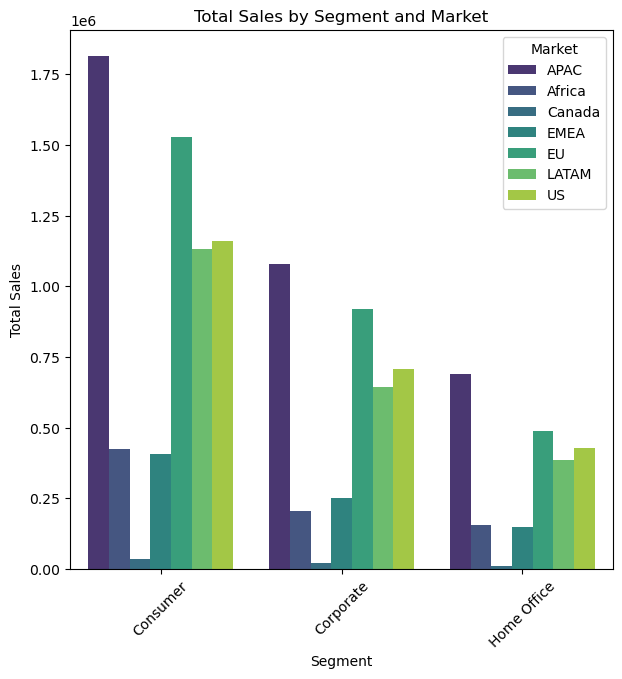

In [27]:
# Aggregated sales by Category and Segment
category_segment_sales = df.groupby(['Category', 'Segment'])['Sales'].sum().reset_index()
plt.figure(figsize=(7, 7))
sns.barplot(data=category_segment_sales, x='Category', y='Sales', hue='Segment', palette='viridis')
plt.title('Total Sales by Category and Segment')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.legend(title='Segment')
plt.xticks(rotation=45)  

# Aggregate sales by Segment and Market
segment_market_sales = df.groupby(['Segment', 'Market'])['Sales'].sum().reset_index()
plt.figure(figsize=(7, 7))
sns.barplot(data=segment_market_sales, x='Segment', y='Sales', hue='Market', palette='viridis')
plt.title('Total Sales by Segment and Market')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.legend(title='Market')
plt.xticks(rotation=45)  
plt.show()

# Profit Report

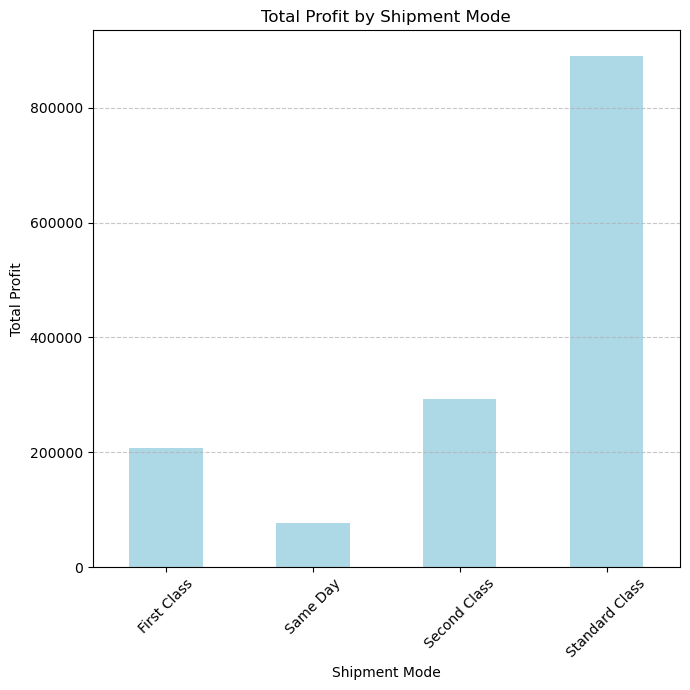

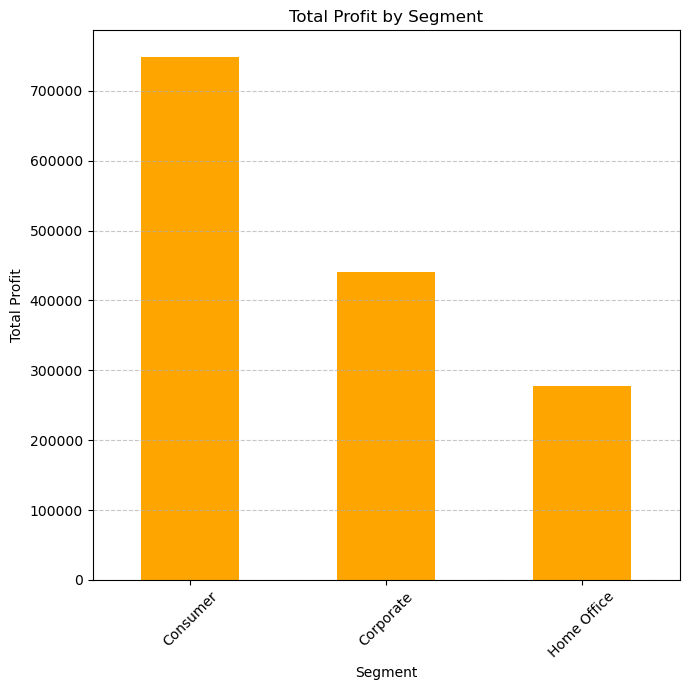

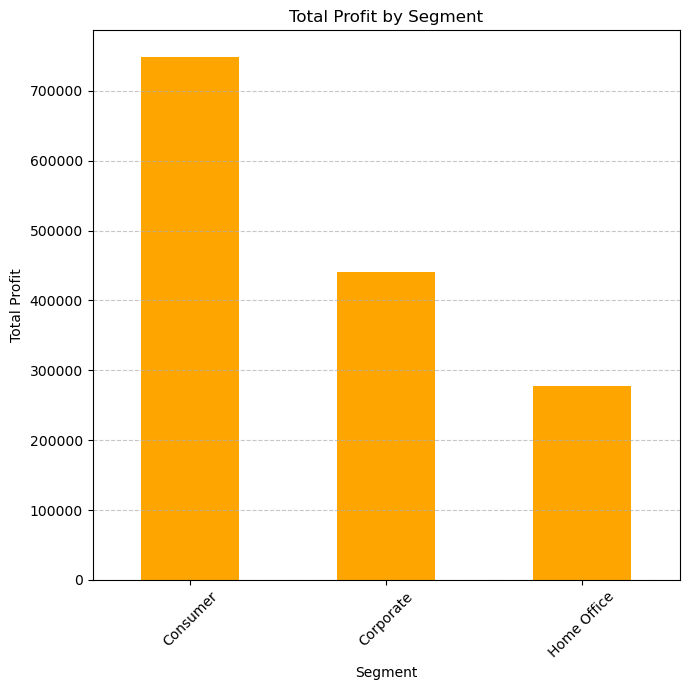

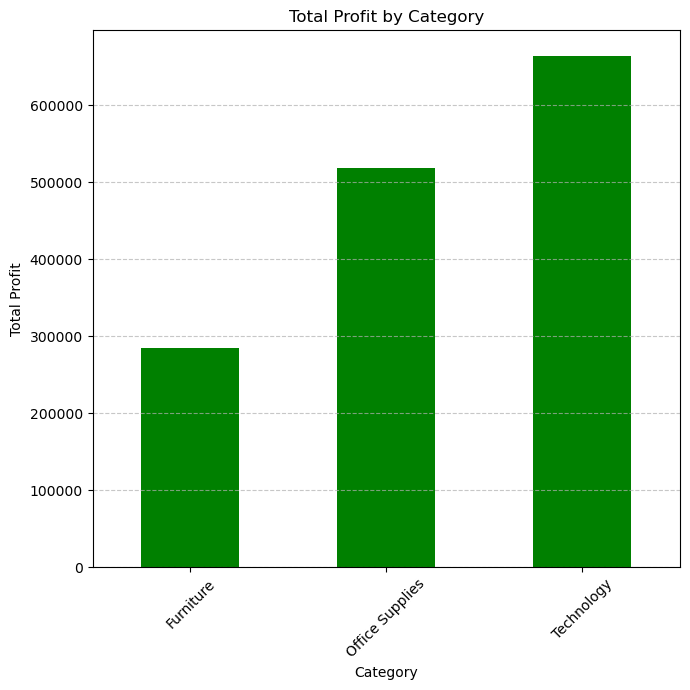

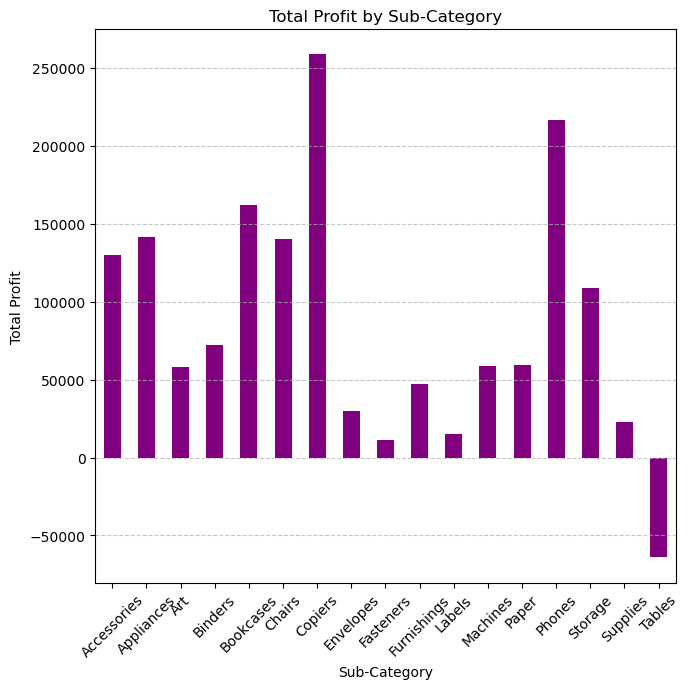

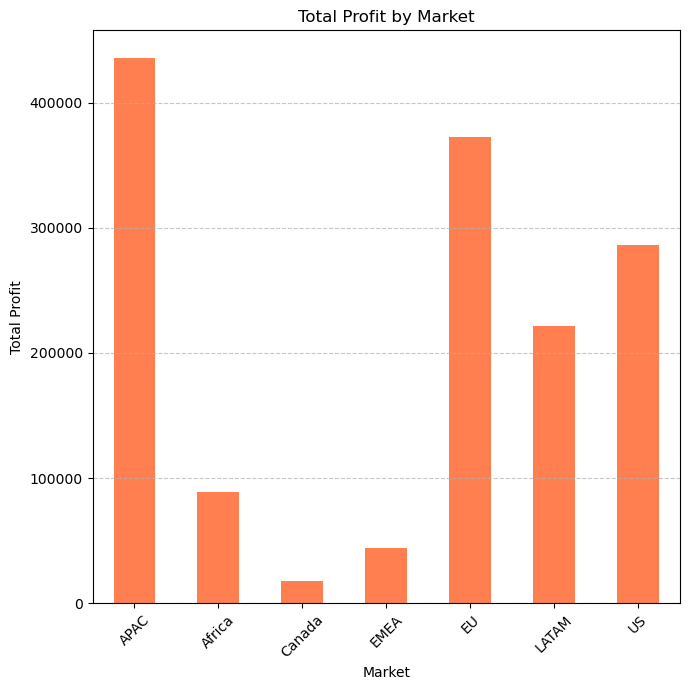

In [29]:
# Group by Ship Mode and sum profits
shipmode_profit = df.groupby('Ship Mode')['Profit'].sum()
plt.figure(figsize=(7,7))
shipmode_profit.plot(kind='bar', color='lightblue')
plt.title('Total Profit by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Group by Segment and sum profits
segment_profit = df.groupby('Segment')['Profit'].sum()
plt.figure(figsize=(7, 7))
segment_profit.plot(kind='bar', color='orange')
plt.title('Total Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Group by Segment and sum profits
segment_profit = df.groupby('Segment')['Profit'].sum()
plt.figure(figsize=(7, 7))
segment_profit.plot(kind='bar', color='orange')
plt.title('Total Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Group by Category and sum profits
category_profit = df.groupby('Category')['Profit'].sum()
plt.figure(figsize=(7, 7))
category_profit.plot(kind='bar', color='green')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Group by Sub-Category and sum profits
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum()
plt.figure(figsize=(7,7))
subcategory_profit.plot(kind='bar', color='purple')
plt.title('Total Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Group by Market and sum profits
market_profit = df.groupby('Market')['Profit'].sum()
plt.figure(figsize=(7, 7))
market_profit.plot(kind='bar', color='coral')
plt.title('Total Profit by Market')
plt.xlabel('Market')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

# Discounts Report

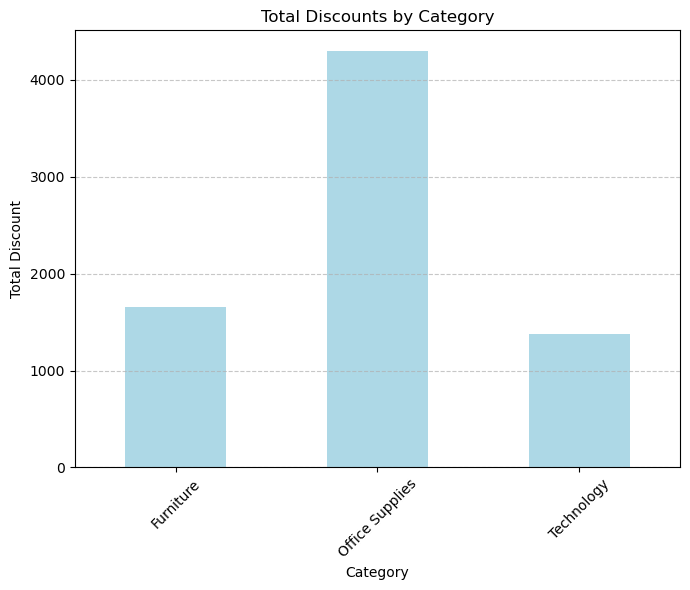

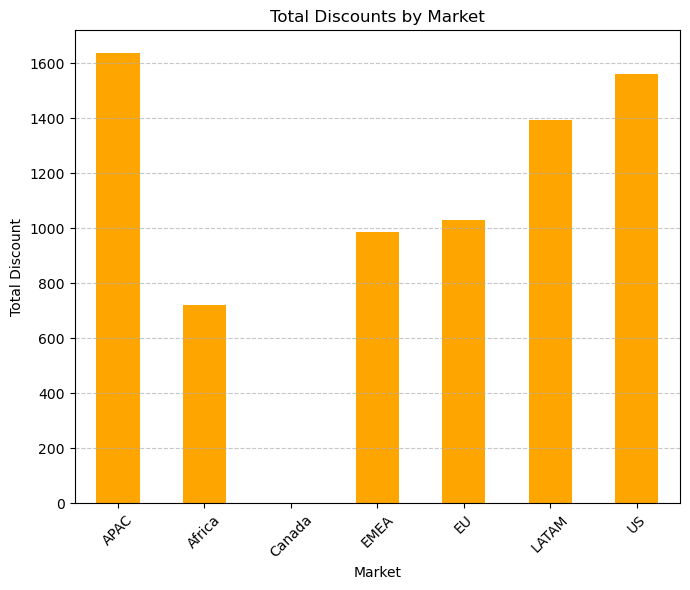

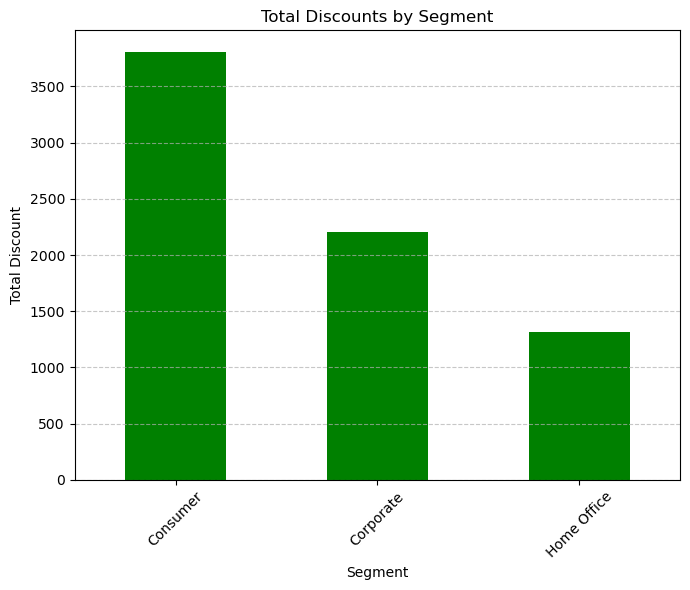

In [31]:
# Group by Category and sum discounts
category_discount = df.groupby('Category')['Discount'].sum()
plt.figure(figsize=(7,6))
category_discount.plot(kind='bar', color='lightblue')
plt.title('Total Discounts by Category')
plt.xlabel('Category')
plt.ylabel('Total Discount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Group by Market and sum discounts
market_discount = df.groupby('Market')['Discount'].sum()
plt.figure(figsize=(7,6))
market_discount.plot(kind='bar', color='orange')
plt.title('Total Discounts by Market')
plt.xlabel('Market')
plt.ylabel('Total Discount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Group by Segment and sum discounts
segment_discount = df.groupby('Segment')['Discount'].sum()
plt.figure(figsize=(7, 6))
segment_discount.plot(kind='bar', color='green')
plt.title('Total Discounts by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Discount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [33]:
print(df['Discount'].unique())

[0.    0.1   0.2   0.4   0.15  0.3   0.5   0.17  0.47  0.25  0.002 0.07
 0.32  0.27  0.7   0.35  0.6   0.65  0.8   0.57  0.37  0.402 0.55  0.202
 0.45  0.602 0.85 ]


In [34]:
dis_values = [round(x * 0.05, 2) for x in range(21)]
print(dis_values)

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


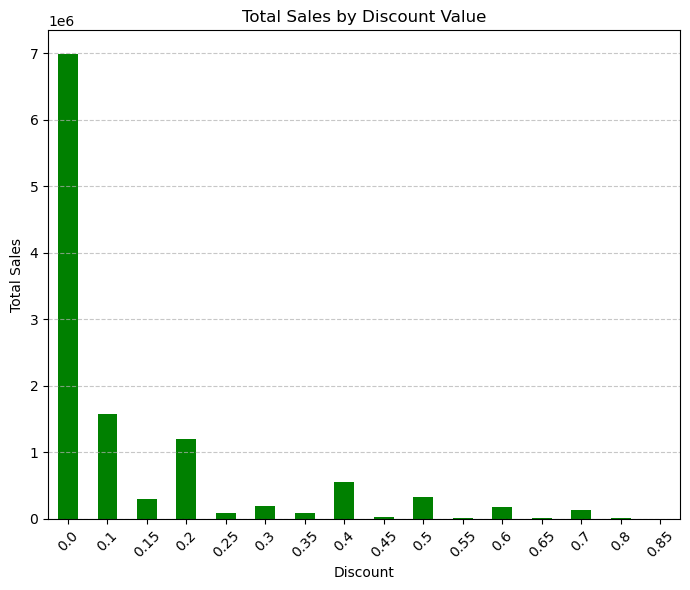

In [35]:
dis_updated = df[df['Discount'].isin(dis_values)]
dis_sales = dis_updated.groupby('Discount')['Sales'].sum()
# Group by discount and sum sales
dis_sales = dis_updated.groupby('Discount')['Sales'].sum()
plt.figure(figsize=(7, 6))
dis_sales.plot(kind='bar', color='Green')
plt.title('Total Sales by Discount Value')
plt.xlabel('Discount')
plt.ylabel('Total Sales')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

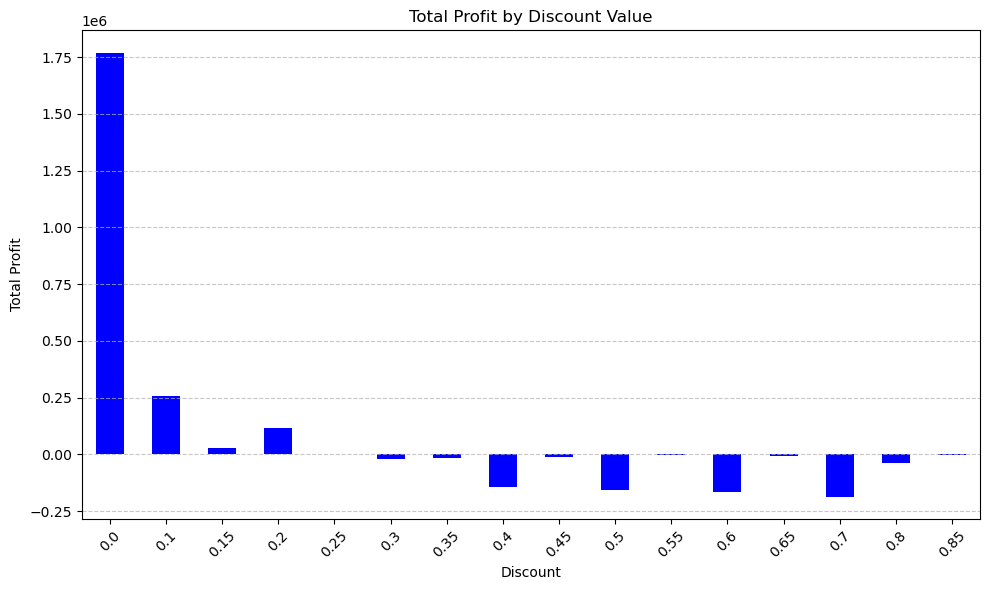

In [36]:
dis_updated = df[df['Discount'].isin(dis_values)]
dis_sales = dis_updated.groupby('Discount')['Profit'].sum()
# Group by discount and sum sales
dis_sales = dis_updated.groupby('Discount')['Profit'].sum()
plt.figure(figsize=(10, 6))
dis_sales.plot(kind='bar', color='Blue')
plt.title('Total Profit by Discount Value')
plt.xlabel('Discount')
plt.ylabel('Total Profit')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

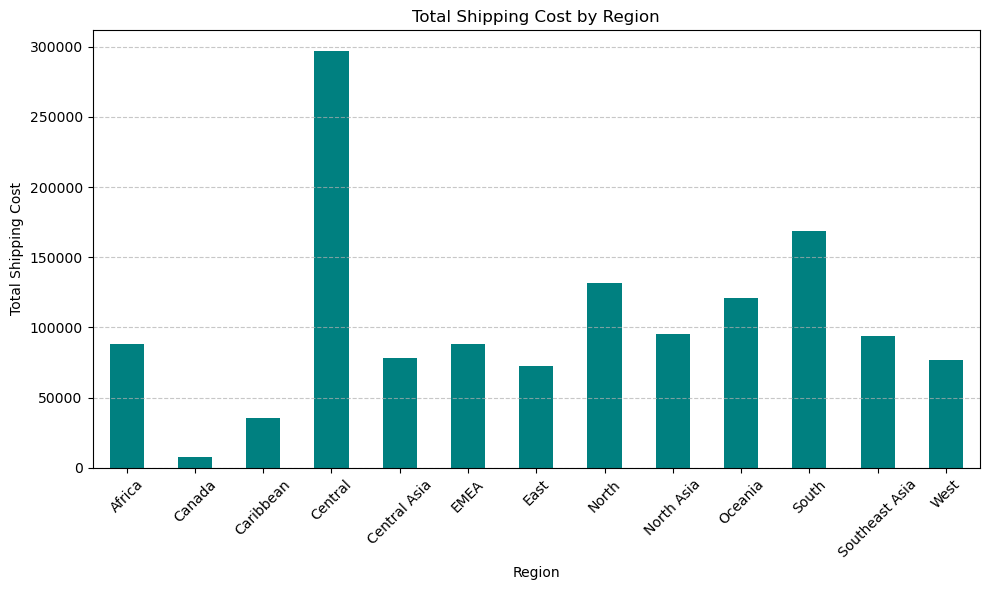

In [37]:
# Group by region and sum shipping costs
region_shipping_costs = df.groupby('Region')['Shipping Cost'].sum()
plt.figure(figsize=(10, 6))
region_shipping_costs.plot(kind='bar', color='teal')
plt.title('Total Shipping Cost by Region')
plt.xlabel('Region')
plt.ylabel('Total Shipping Cost')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

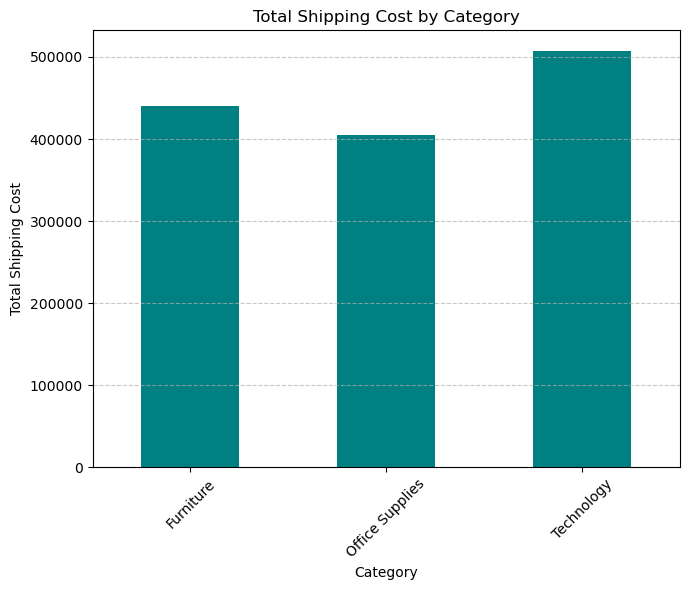

In [39]:
# Group by Category and sum shipping costs
category_shipping_cost = df.groupby('Category')['Shipping Cost'].sum()
plt.figure(figsize=(7, 6))
category_shipping_cost.plot(kind='bar', color='teal')
plt.title('Total Shipping Cost by Category')
plt.xlabel('Category')
plt.ylabel('Total Shipping Cost')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

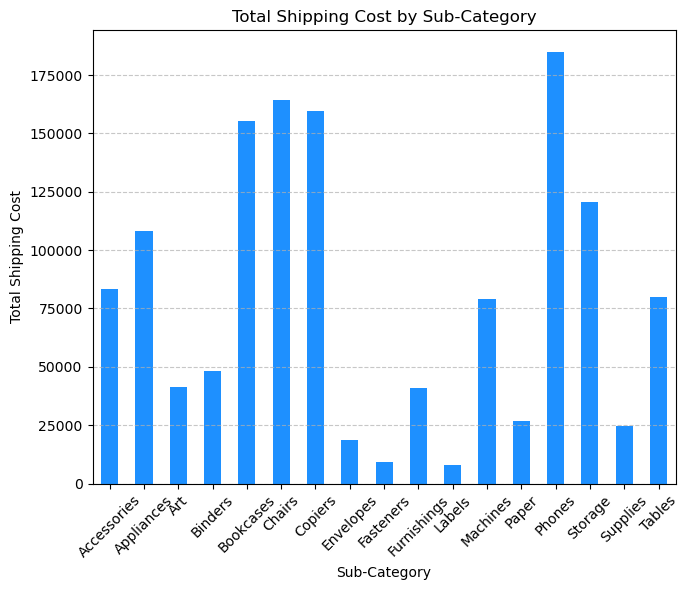

In [40]:
# Group by Sub-Category and sum shipping costs
subcategory_shipping_cost = df.groupby('Sub-Category')['Shipping Cost'].sum()
plt.figure(figsize=(7, 6))
subcategory_shipping_cost.plot(kind='bar', color='dodgerblue')
plt.title('Total Shipping Cost by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Shipping Cost')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Order Proximity Report

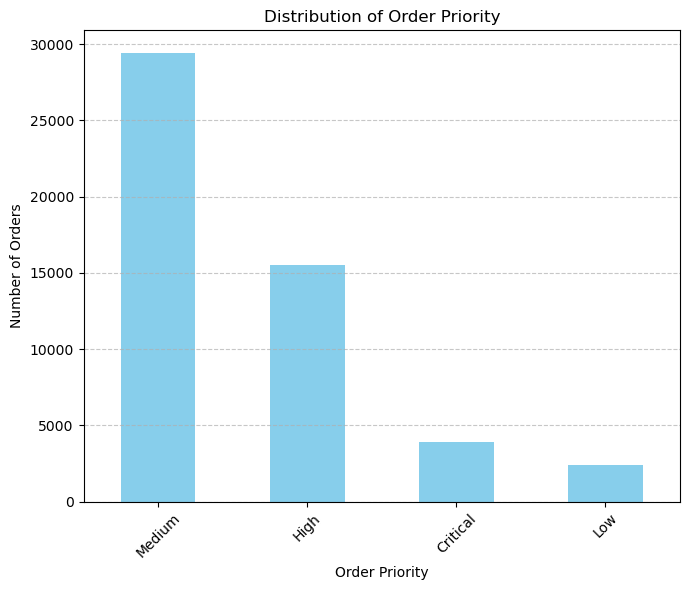

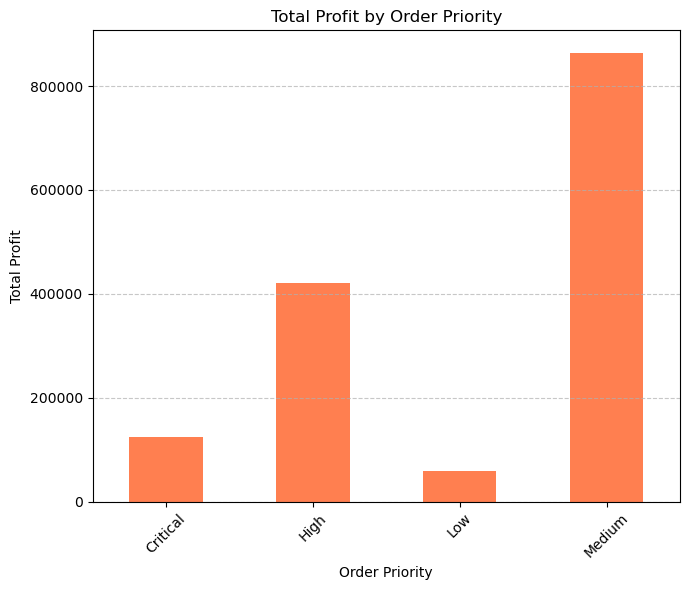

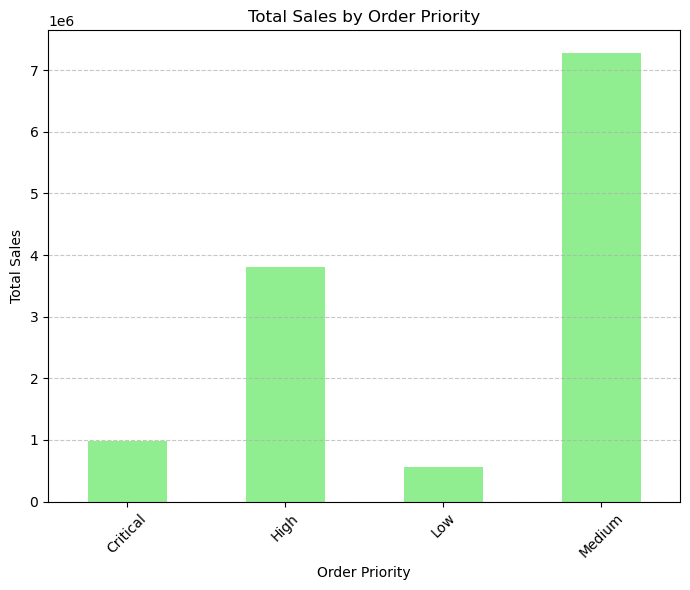

In [41]:
# Count the number of orders by priority
priority_count = df['Order Priority'].value_counts()
plt.figure(figsize=(7, 6))
priority_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

priority_profit = df.groupby('Order Priority')['Profit'].sum()
plt.figure(figsize=(7, 6))
priority_profit.plot(kind='bar', color='coral')
plt.title('Total Profit by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Group by Order Priority and sum sales
priority_sales = df.groupby('Order Priority')['Sales'].sum()
plt.figure(figsize=(7, 6))
priority_sales.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


<Figure size 1800x1400 with 0 Axes>

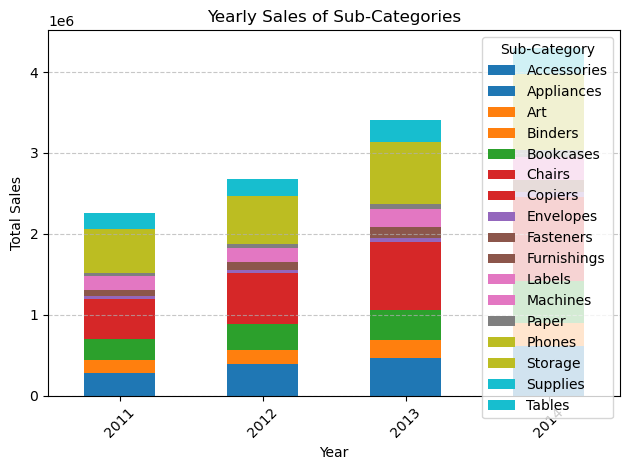

In [45]:
# Group by Year and Sub-Category, then sum the sales
yearly_subcategory_sales = df.groupby(['Year', 'Sub-Category'])['Sales'].sum().unstack()
plt.figure(figsize=(18, 14))
yearly_subcategory_sales.plot(kind='bar', stacked=True, colormap='tab10')
plt.title('Yearly Sales of Sub-Categories')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Sub-Category')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

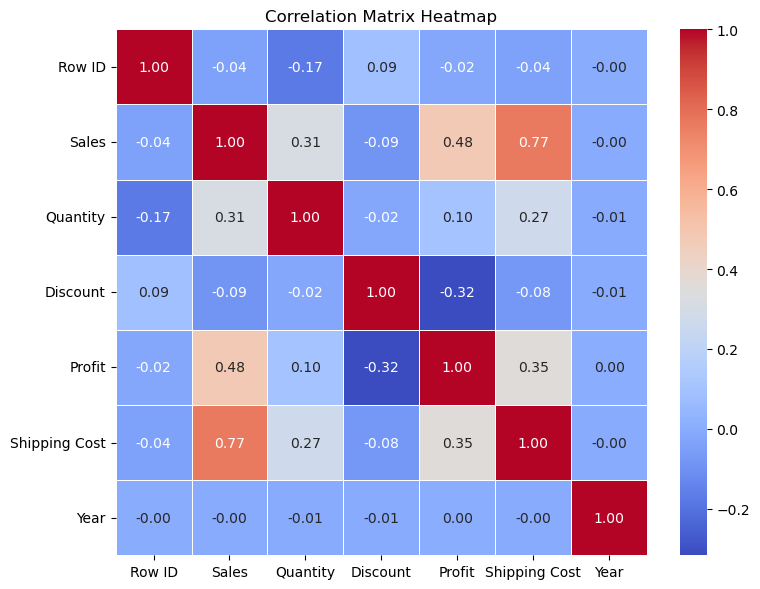

In [48]:
# Computing correlation matrix
correlation_matrix = df.corr()
# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

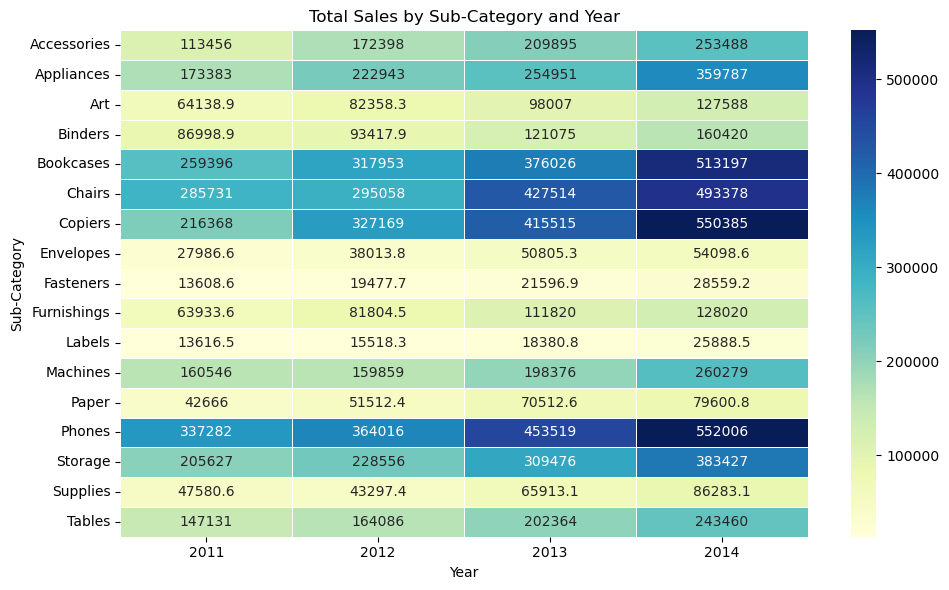

In [49]:
# Pivot table for heat map
heatmap_data = df.pivot_table(values='Sales', index='Sub-Category', columns='Year', aggfunc='sum', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g', linewidths=0.5)
plt.title('Total Sales by Sub-Category and Year')
plt.xlabel('Year')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()

# Trends Analysis

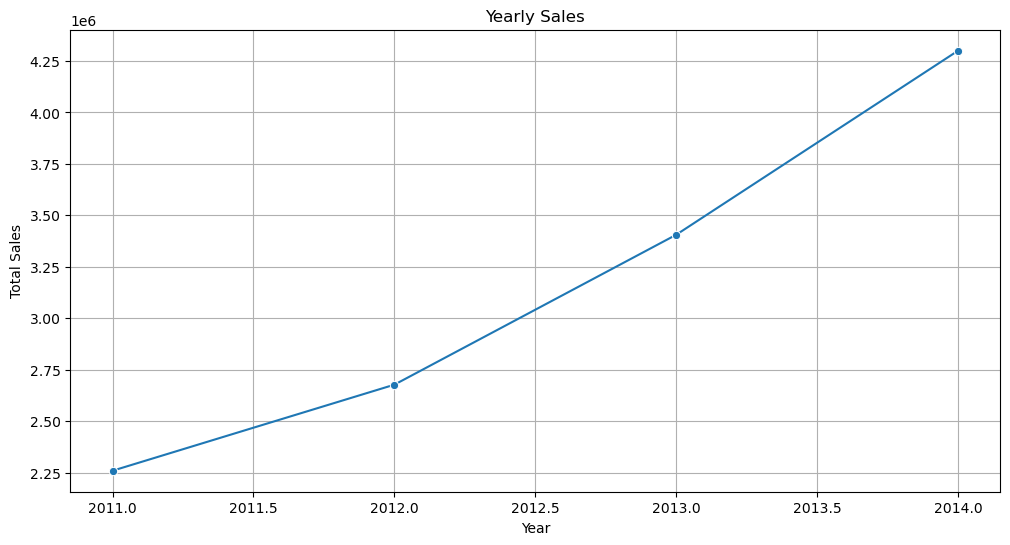

In [55]:
# Extracting the year from 'Order Date'
df['Year'] = df['Order Date'].dt.year

yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sales, x='Year', y='Sales', marker='o', palette='viridis')
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

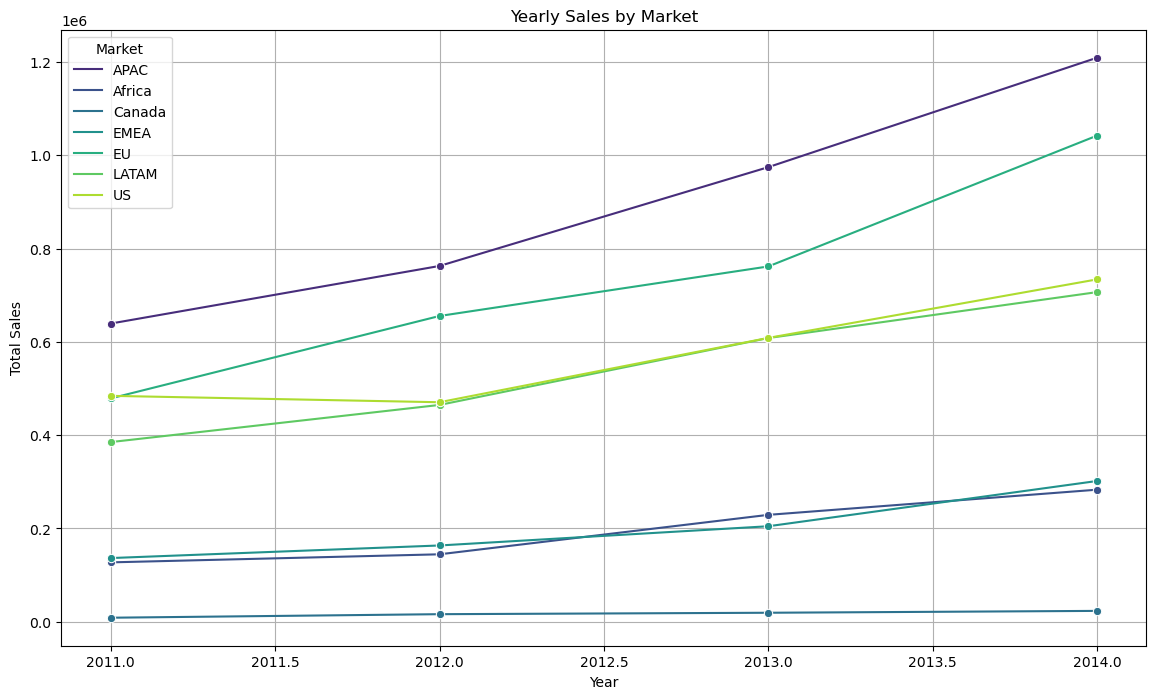

In [56]:
# Aggregate sales by Year and Market
yearly_market_sales = df.groupby(['Year', 'Market'])['Sales'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=yearly_market_sales, x='Year', y='Sales', hue='Market', marker='o', palette='viridis')

# Add a title and labels
plt.title('Yearly Sales by Market')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Market')
plt.grid(True)
plt.show()

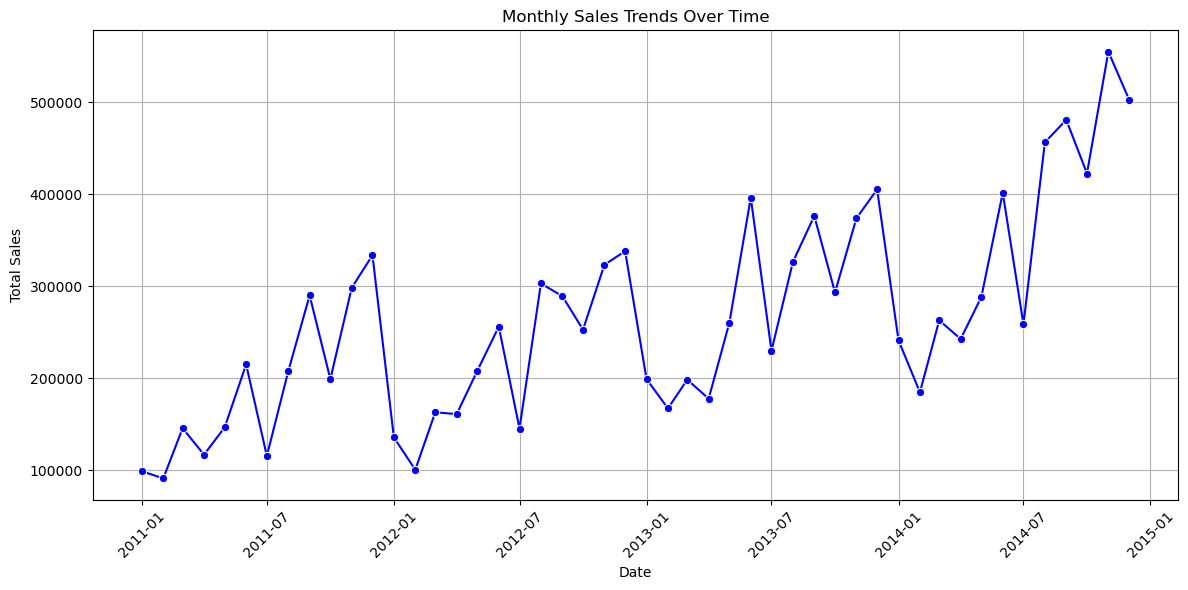

In [50]:
df['Month'] = df['Order Date'].dt.month

# Group by Year and Month, then sum sales
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=monthly_sales, marker='o', color='b')
plt.title('Monthly Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

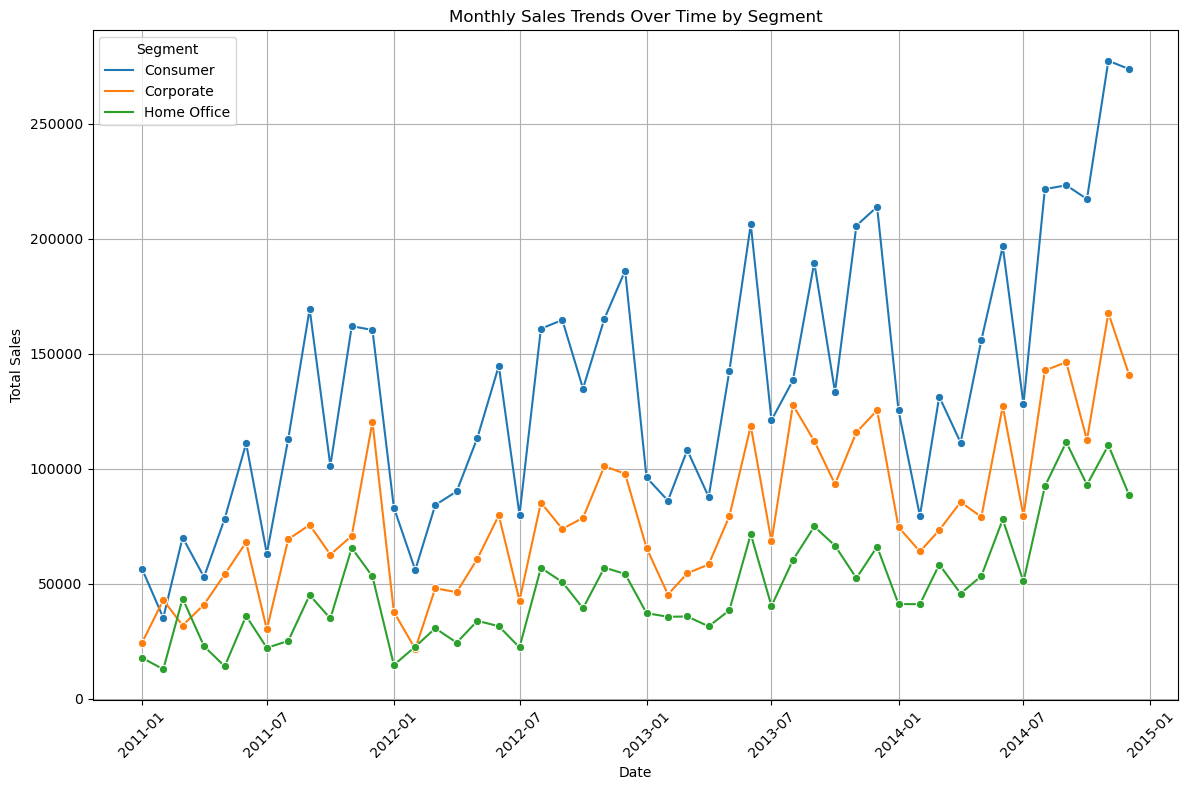

In [51]:
# Group by Year, Month, and Segment, then sum sales
monthly_sales_segment = df.groupby(['Year', 'Month', 'Segment'])['Sales'].sum().reset_index()
monthly_sales_segment['Date'] = pd.to_datetime(monthly_sales_segment[['Year', 'Month']].assign(DAY=1))
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='Sales', hue='Segment', data=monthly_sales_segment, marker='o')
plt.title('Monthly Sales Trends Over Time by Segment')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

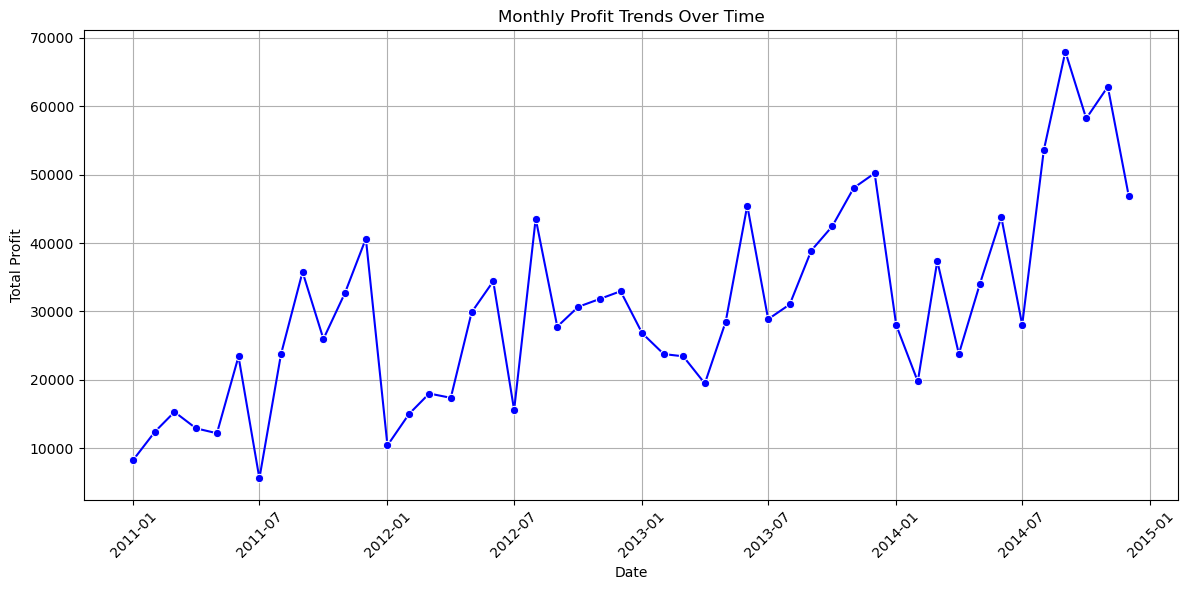

In [52]:
# Group by Year and Month, then sum profit
monthly_profit = df.groupby(['Year', 'Month'])['Profit'].sum().reset_index()
monthly_profit['Date'] = pd.to_datetime(monthly_profit[['Year', 'Month']].assign(DAY=1))
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Profit', data=monthly_profit, marker='o', color='b')
plt.title('Monthly Profit Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

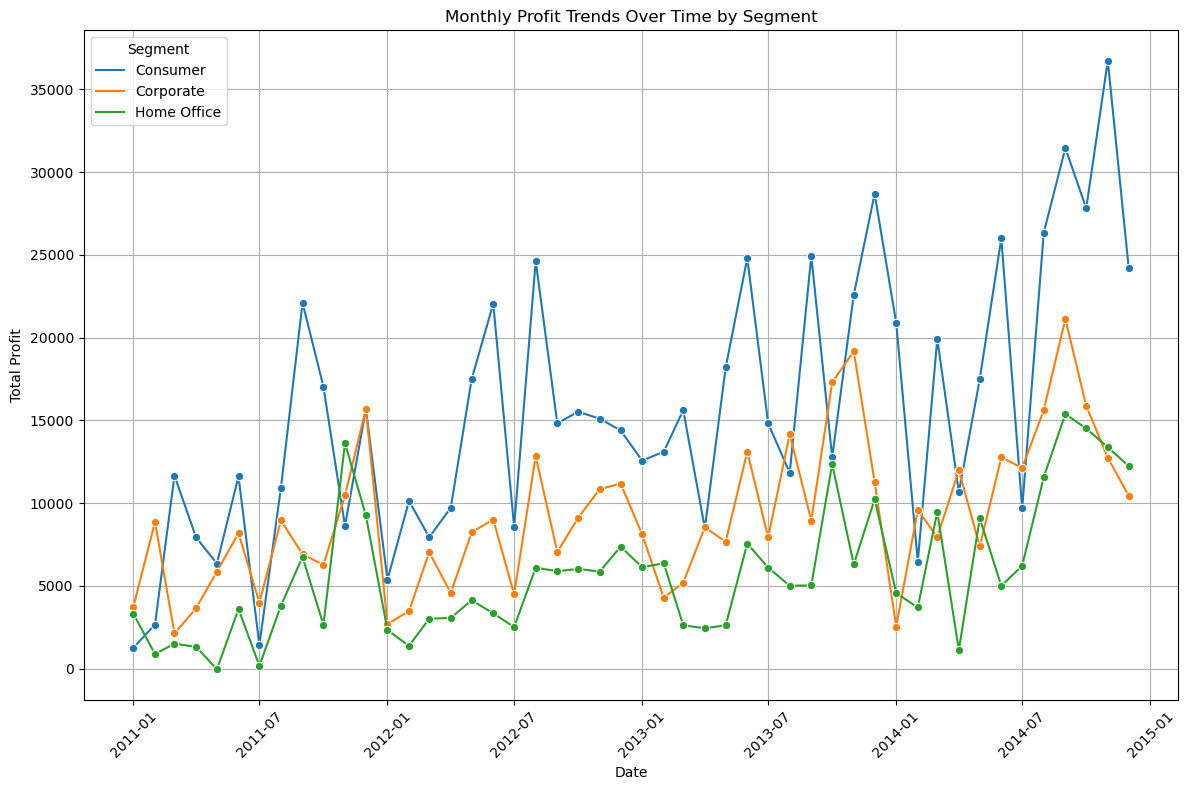

In [53]:
# Group by Year, Month, and Segment, then sum profit
monthly_profit_segment = df.groupby(['Year', 'Month', 'Segment'])['Profit'].sum().reset_index()
monthly_profit_segment['Date'] = pd.to_datetime(monthly_profit_segment[['Year', 'Month']].assign(DAY=1))
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='Profit', hue='Segment', data=monthly_profit_segment, marker='o')
plt.title('Monthly Profit Trends Over Time by Segment')
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

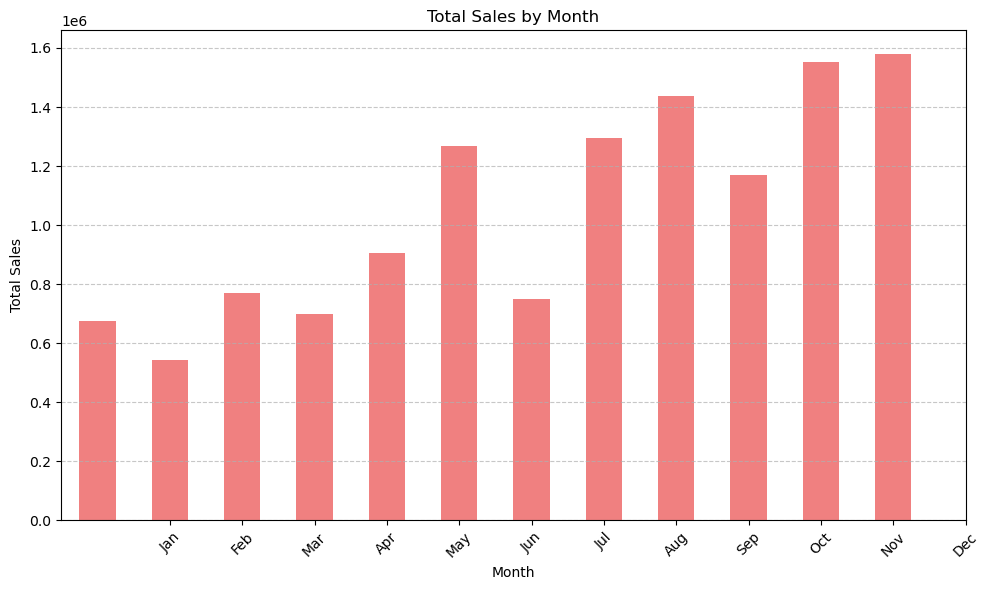

In [54]:
#Seasonal Trends
# Add month column for seasonal analysis
df['Month'] = df['Order Date'].dt.month

# Group by month and sum sales
monthly_sales = df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='lightcoral')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
    rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()